# To Do
    .Prendre un Dataset
    .Le télécharger
    .L'importer via pytorch
    .Analyser le dataset
    .Préparer le dataset pour entrainement
    

In [1]:
#!pip install torch

In [2]:
#!pip install opendatasets

In [3]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

## Import des Packages

In [4]:
import opendatasets as od
import os
import matplotlib.pyplot as plt
import albumentations as al

## Téléchargement des données

In [5]:
data_url=("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

In [6]:
#od.download(data_url)

In [7]:
data_dir = './chest-xray-pneumonia/chest_xray'

In [8]:
os.listdir(data_dir)

['test', 'train', 'val']

## Import dans Pytorch

In [9]:
from torchvision.datasets import ImageFolder

In [10]:
data_train=data_dir+"/train"
data_val=data_dir+"/val"
data_test=data_dir+"/test"

In [11]:
dataset = ImageFolder(data_train)

In [12]:
len(dataset)

5216

In [13]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=2090x1858>, 0)

In [14]:
dataset.classes

['NORMAL', 'PNEUMONIA']

In [15]:
%matplotlib inline

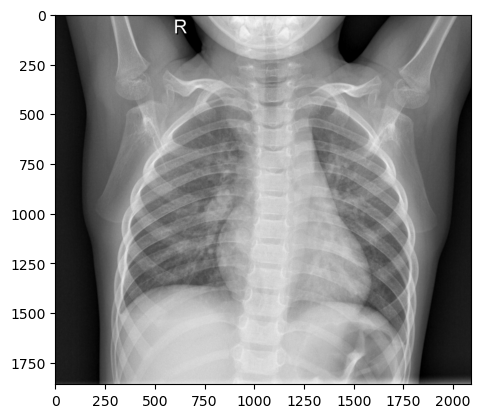

In [16]:
img, label = dataset[0]
plt.imshow(img)

In [17]:
import torchvision.transforms as tt

train = ImageFolder(data_train, tt.Compose([tt.Resize(64),
                                              tt.RandomCrop(64),
                                             tt.ToTensor()]))

In [18]:

test = ImageFolder(data_test, tt.Compose([tt.Resize(64),
                                              tt.RandomCrop(64),
                                             tt.ToTensor()]))

In [19]:


val = ImageFolder(data_val, tt.Compose([tt.Resize(64),
                                              tt.RandomCrop(64),
                                             tt.ToTensor()]))

In [20]:
#dans le cas ou les données ne sont pas déjà réparties en train/test/val

dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(64),
                                              tt.RandomCrop(64),
                                             tt.ToTensor()]))

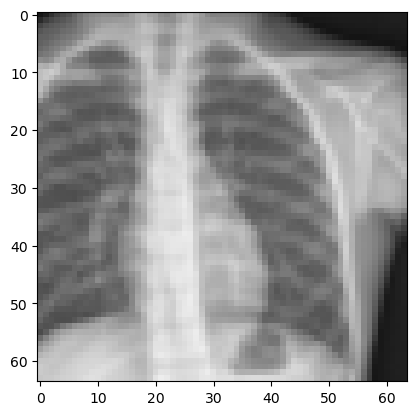

In [21]:
img, label = dataset[0]
plt.imshow(img.permute(1,2,0))

In [22]:
#Optionnel si le dataset n'est pas déjà trié en train test et validation

val_pct = 0.1
val_size = int(val_pct*len(dataset))

train_size = len(dataset) - val_size
train_size, val_size

(5271, 585)

In [23]:
#Toujours Optionnel
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset,[train_size,val_size])
len(train_ds), len(valid_ds)

(5271, 585)

In [24]:
from torch.utils.data import DataLoader

In [25]:
len(train), len(val)

(5216, 16)

In [26]:

batch_size = 128 #256 était tros gros pour la VRAM

train_dl = DataLoader(train, batch_size, 
                      shuffle = True, 
                      num_workers=4,
                      pin_memory=True)

val_dl = DataLoader(val, batch_size, 
                      shuffle = True, 
                      num_workers=4,
                      pin_memory=True)

len(train_dl), len(val_dl)

(41, 1)

In [27]:
from torchvision.utils import make_grid

def show_batch(dl):
        for images, labels in dl:
            fig, ax= plt.subplots(figsize=(12,6))
            ax.set_xticks([]); ax.set_yticks([])
            ax.imshow(make_grid(images, nrows=16).permute(1,2,0))
            break

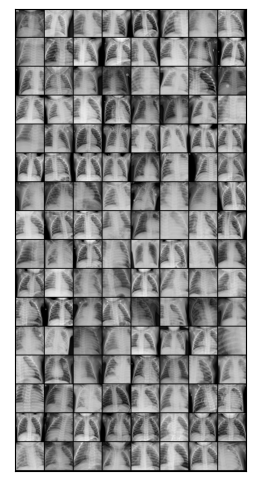

In [28]:
show_batch(train_dl)

## Exploration


In [29]:
for cls in os.listdir(data_train):
    print(cls, ':', len(os.listdir(data_train+'/'+cls)))

NORMAL : 1341
PNEUMONIA : 3875


## GPU PAREMETERS

#### Fonction pour mettre le GPU en par défaut (si possible)

In [30]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [31]:
torch.cuda.is_available()

True

In [32]:
device = get_default_device()
device

device(type='cuda')

In [33]:
img, label = dataset[0]

In [34]:
img

tensor([[[0.0863, 0.0863, 0.1216,  ..., 0.1216, 0.1216, 0.1216],
         [0.0980, 0.1647, 0.2314,  ..., 0.1176, 0.1216, 0.1216],
         [0.2157, 0.2706, 0.3176,  ..., 0.1137, 0.1137, 0.1137],
         ...,
         [0.7922, 0.7961, 0.7804,  ..., 0.1137, 0.1216, 0.1216],
         [0.7922, 0.7922, 0.7804,  ..., 0.1098, 0.1176, 0.1255],
         [0.7686, 0.7765, 0.7882,  ..., 0.1098, 0.1176, 0.1216]],

        [[0.0863, 0.0863, 0.1216,  ..., 0.1216, 0.1216, 0.1216],
         [0.0980, 0.1647, 0.2314,  ..., 0.1176, 0.1216, 0.1216],
         [0.2157, 0.2706, 0.3176,  ..., 0.1137, 0.1137, 0.1137],
         ...,
         [0.7922, 0.7961, 0.7804,  ..., 0.1137, 0.1216, 0.1216],
         [0.7922, 0.7922, 0.7804,  ..., 0.1098, 0.1176, 0.1255],
         [0.7686, 0.7765, 0.7882,  ..., 0.1098, 0.1176, 0.1216]],

        [[0.0863, 0.0863, 0.1216,  ..., 0.1216, 0.1216, 0.1216],
         [0.0980, 0.1647, 0.2314,  ..., 0.1176, 0.1216, 0.1216],
         [0.2157, 0.2706, 0.3176,  ..., 0.1137, 0.1137, 0.

In [35]:
img.device

device(type='cpu')

In [36]:
img_gpu=to_device(img,device)
img_gpu.device

device(type='cuda', index=0)

In [37]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

## Model et entrainement

In [38]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss (use binary_cross_entropy for multi label-classification and use means square error loss for regression)
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            """ on utitlise plusieurs batch car on ne pourrait compute toute les images en une fois avec la VRAM"""
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

### MODEL

In [40]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64 ou # Input: 128 x 3 x 128 x 128
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32 (Meme nombre de channel et pas de pool du coup on garde les mêmes dimmension)
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8 
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8 
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

##### conv1 : 3 <=> inchannels (entrées), devient 64; conv2 les 64 entrées deviennent 128 et à cause du pooling les 64 pixels descendent à 32 (divisé par 2 car nn.MaxPool2d est à (2)))

nn.MaxPool2d(8) aurait pu remplacer le nn.AdaptiveMaxPool2d(1) dans le self.classifier, mais le nn.AdaptiveMaxPool2d(1) s'adapte à tout les input d'entrer et renvois en 1 x 1

https://raw.githubusercontent.com/lambdal/cifar10-fast/master/net.svg (shéma du NN)

In [41]:
img_gpu.shape

torch.Size([3, 64, 64])

In [42]:
model = to_device(ResNet9(3, len(train.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [43]:
model.conv1[0].weight.device

device(type='cuda', index=0)

Passage d'un batch d'input dans le model

In [44]:
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = model(images)
    print('preds.shape', preds.shape)
    break

images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0


C:\Users\Yoan\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


preds.shape torch.Size([128, 2])


### TRAINING

In [45]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 0.6939070224761963, 'val_acc': 0.5}]

In [46]:
history += fit(epochs=5, lr=0.001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.4684, val_loss: 1.6306, val_acc: 0.5000
Epoch [1], train_loss: 0.2308, val_loss: 0.9360, val_acc: 0.5000
Epoch [2], train_loss: 0.1902, val_loss: 0.9675, val_acc: 0.5000
Epoch [3], train_loss: 0.1778, val_loss: 1.2027, val_acc: 0.5000
Epoch [4], train_loss: 0.1665, val_loss: 0.7505, val_acc: 0.6250


In [47]:
history += fit(epochs=5, lr=0.001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.1449, val_loss: 0.7405, val_acc: 0.6250
Epoch [1], train_loss: 0.1267, val_loss: 0.7379, val_acc: 0.6250
Epoch [2], train_loss: 0.1228, val_loss: 0.6859, val_acc: 0.6250
Epoch [3], train_loss: 0.1174, val_loss: 0.7341, val_acc: 0.6875
Epoch [4], train_loss: 0.1177, val_loss: 0.8302, val_acc: 0.6250


In [48]:
history += fit(epochs=5, lr=0.001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.1118, val_loss: 1.1897, val_acc: 0.5625
Epoch [1], train_loss: 0.1170, val_loss: 0.9116, val_acc: 0.6250
Epoch [2], train_loss: 0.1026, val_loss: 0.6769, val_acc: 0.6250
Epoch [3], train_loss: 0.1031, val_loss: 1.1417, val_acc: 0.5000
Epoch [4], train_loss: 0.1019, val_loss: 0.5587, val_acc: 0.6875


On reduit le LR (learning rate)

In [49]:
history += fit(epochs=5, lr=0.0001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.0932, val_loss: 0.6965, val_acc: 0.6875
Epoch [1], train_loss: 0.0913, val_loss: 0.7532, val_acc: 0.6875
Epoch [2], train_loss: 0.0991, val_loss: 0.8376, val_acc: 0.6250
Epoch [3], train_loss: 0.0897, val_loss: 0.7893, val_acc: 0.6250
Epoch [4], train_loss: 0.0960, val_loss: 0.7438, val_acc: 0.6250


Test avec le SGD

In [50]:
history += fit(epochs=5, lr=0.0001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.0938, val_loss: 0.7774, val_acc: 0.6250
Epoch [1], train_loss: 0.0956, val_loss: 0.8610, val_acc: 0.6250
Epoch [2], train_loss: 0.0877, val_loss: 0.8160, val_acc: 0.6875
Epoch [3], train_loss: 0.0900, val_loss: 0.8924, val_acc: 0.5625
Epoch [4], train_loss: 0.0915, val_loss: 0.8569, val_acc: 0.6250


In [51]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

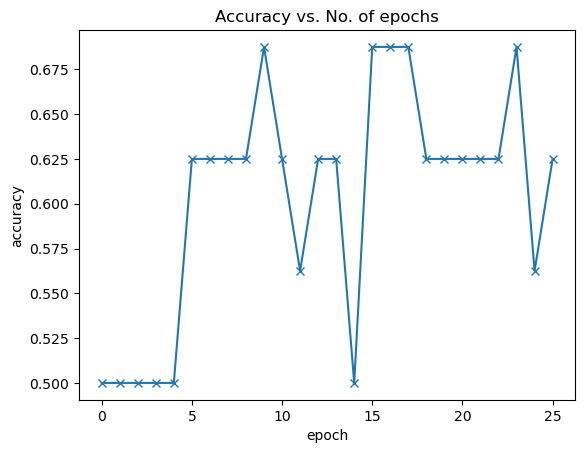

In [52]:
plot_accuracies(history)

In [53]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

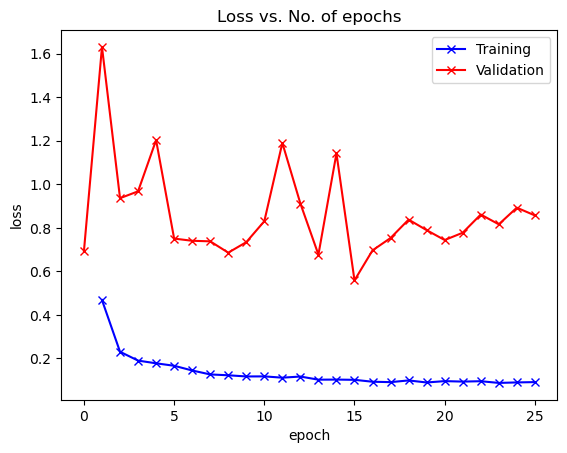

In [54]:
plot_losses(history)


On a pas encore d'overfitting (la courbe de validation de remonte pas encore) on peut donc pousser encore l'entrainement

In [55]:
history += fit(epochs=5, lr=0.0001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.0875, val_loss: 0.9069, val_acc: 0.5625
Epoch [1], train_loss: 0.0911, val_loss: 0.8460, val_acc: 0.6875
Epoch [2], train_loss: 0.0986, val_loss: 0.8625, val_acc: 0.6250
Epoch [3], train_loss: 0.0968, val_loss: 0.8049, val_acc: 0.6250
Epoch [4], train_loss: 0.0913, val_loss: 0.7421, val_acc: 0.6875


In [58]:
history += fit(epochs=5, lr=0.0001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.0924, val_loss: 1.0635, val_acc: 0.5625
Epoch [1], train_loss: 0.0920, val_loss: 1.0147, val_acc: 0.5625
Epoch [2], train_loss: 0.0881, val_loss: 0.8446, val_acc: 0.6875
Epoch [3], train_loss: 0.0971, val_loss: 0.9044, val_acc: 0.5625
Epoch [4], train_loss: 0.0894, val_loss: 0.8201, val_acc: 0.6250


In [59]:
history += fit(epochs=5, lr=0.0001, model=model, train_loader=train_dl, val_loader=val_dl, opt_func=torch.optim.SGD)

Epoch [0], train_loss: 0.0847, val_loss: 0.7762, val_acc: 0.6875
Epoch [1], train_loss: 0.0891, val_loss: 0.8615, val_acc: 0.6250
Epoch [2], train_loss: 0.0918, val_loss: 0.7218, val_acc: 0.6875
Epoch [3], train_loss: 0.0853, val_loss: 0.9835, val_acc: 0.6250
Epoch [4], train_loss: 0.0870, val_loss: 0.8522, val_acc: 0.5625


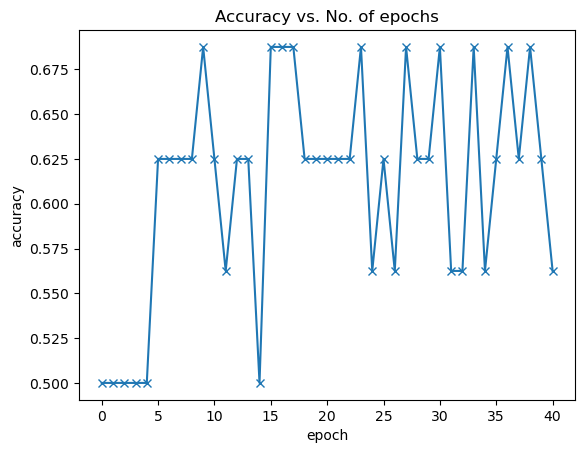

In [60]:
plot_accuracies(history)

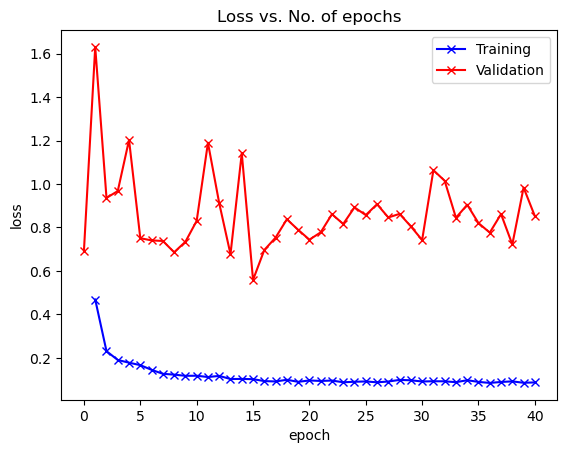

In [61]:
plot_losses(history)

Le model semble se stabiliser 

On enregistre donc pour les hyperparamètres : 
    
    Epochs : [5, 5, 5, 5, 5, 5]
    
    Learning rate : [0.001, 0.001, 0.001, 0.0001, 0.0001]
    
    Optimiser : [Adam, Adam, Adam, SGD, SGD]

In [58]:
Metrics = history[-1]
Metrics

{'val_loss': 0.5434067845344543,
 'val_acc': 0.6875,
 'train_loss': 0.012581921182572842}

In [59]:
torch.save(model, 'PNEUMONIA-resnet9.pth')

#### Si l'on veut reloader le model : 

In [113]:
model_load = torch.load('./chest-xray-pneumonia/PNEUMONIA-resnet9.pth')
model_load.eval()

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

## Test

In [63]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [64]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, train.classes)
    print('Target:', test.classes[label])
    print('Prediction:', pred)

In [82]:
test.classes

['NORMAL', 'PNEUMONIA']

Target: PNEUMONIA
Prediction: PNEUMONIA


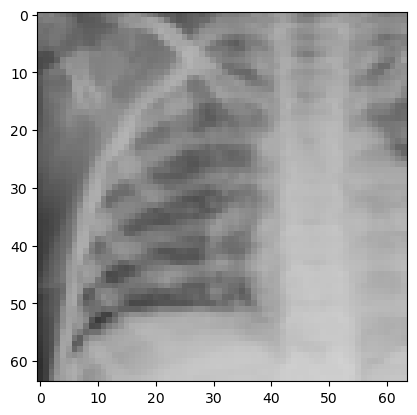

In [71]:
show_image_prediction(*test[500])

In [69]:
test_dl = DataLoader(test, batch_size, 
                      shuffle = True, 
                      num_workers=4,
                      pin_memory=True)
test_dl = DeviceDataLoader(test_dl, device)

In [67]:
[evaluate(model, val_dl)]


[{'val_loss': 0.7963333129882812, 'val_acc': 0.5625}]

In [70]:
[evaluate(model, test_dl)]

[{'val_loss': 0.8145269751548767, 'val_acc': 0.7618303298950195}]

In [81]:
len(test)

624

In [100]:
img, label=test[400]
img

tensor([[[0.3098, 0.3137, 0.3333,  ..., 0.2196, 0.2196, 0.2196],
         [0.2706, 0.2784, 0.2863,  ..., 0.2314, 0.2314, 0.2353],
         [0.2549, 0.2588, 0.2627,  ..., 0.2431, 0.2471, 0.2510],
         ...,
         [0.5922, 0.6000, 0.6118,  ..., 0.5608, 0.5608, 0.5804],
         [0.5882, 0.6039, 0.6196,  ..., 0.5647, 0.5608, 0.5765],
         [0.5843, 0.6039, 0.6196,  ..., 0.5843, 0.5725, 0.5725]],

        [[0.3098, 0.3137, 0.3333,  ..., 0.2196, 0.2196, 0.2196],
         [0.2706, 0.2784, 0.2863,  ..., 0.2314, 0.2314, 0.2353],
         [0.2549, 0.2588, 0.2627,  ..., 0.2431, 0.2471, 0.2510],
         ...,
         [0.5922, 0.6000, 0.6118,  ..., 0.5608, 0.5608, 0.5804],
         [0.5882, 0.6039, 0.6196,  ..., 0.5647, 0.5608, 0.5765],
         [0.5843, 0.6039, 0.6196,  ..., 0.5843, 0.5725, 0.5725]],

        [[0.3098, 0.3137, 0.3333,  ..., 0.2196, 0.2196, 0.2196],
         [0.2706, 0.2784, 0.2863,  ..., 0.2314, 0.2314, 0.2353],
         [0.2549, 0.2588, 0.2627,  ..., 0.2431, 0.2471, 0.

In [65]:
y_pred=[]
y_true=[]
for img, label in test:
    pred = predict_image(img, model, train.classes)
    y_pred.append(pred)
    y_true.append(test.classes[label])

In [108]:
y_true

['NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',

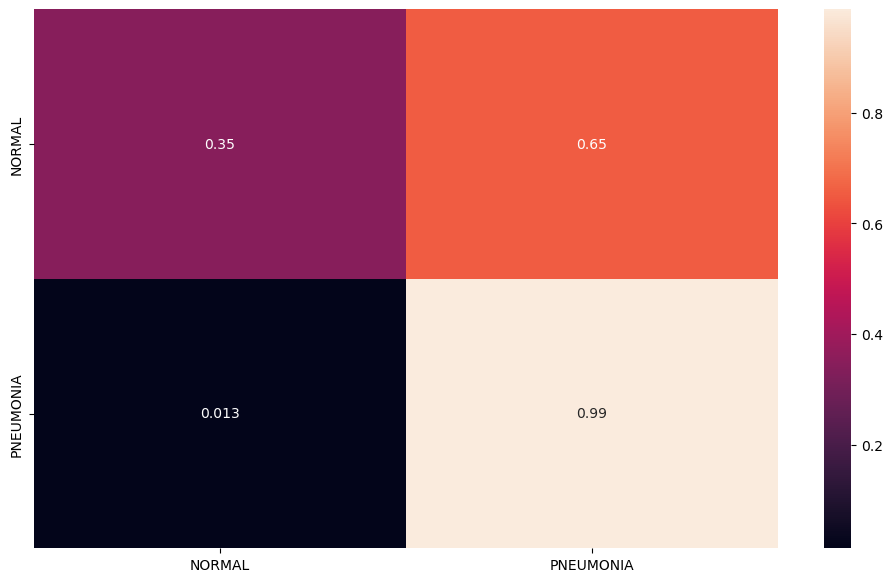

In [66]:

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

# constant for classes
classes = ('NORMAL', 'PNEUMONIA')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')
